<a href="https://colab.research.google.com/github/angle17kavya/Olympic-Medal-Prediction/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

In [ ]:
summer_df=pd.read_csv('/content/sample_data/Athletes_summer_games.csv')
winter_df=pd.read_csv('/content/sample_data/Athletes_winter_games.csv')
region_df=pd.read_csv('/content/sample_data/regions.csv')

In [ ]:
summer_df.dtypes

Unnamed: 0      int64
Name           object
Sex            object
Age           float64
Team           object
NOC            object
Games          object
Year            int64
Season         object
City           object
Sport          object
Event          object
Medal          object
dtype: object

In [ ]:
summer_df.shape


(237673, 13)

In [ ]:
summer_df.Season.unique()

array(['Summer'], dtype=object)

In [ ]:
summer_df.NOC.unique()

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

### **For winter data**

In [ ]:
winter_df.dtypes

Unnamed: 0      int64
Name           object
Sex            object
Age           float64
Team           object
NOC            object
Games          object
Year            int64
Season         object
City           object
Sport          object
Event          object
Medal          object
dtype: object

In [ ]:
winter_df.shape

(48564, 13)

In [ ]:
winter_df.Season.unique()

array(['Winter'], dtype=object)

In [ ]:
winter_df.NOC.unique()

array(['NED', 'USA', 'FIN', 'NOR', 'EST', 'PAK', 'IRI', 'ITA', 'JPN',
       'CAN', 'FRG', 'ARG', 'SWE', 'ISV', 'SUI', 'FRA', 'UKR', 'LAT',
       'ESP', 'LIB', 'GEO', 'BLR', 'RUS', 'CRO', 'BUL', 'GER', 'POL',
       'ROU', 'URS', 'AUS', 'GBR', 'TCH', 'CZE', 'GDR', 'KAZ', 'BEL',
       'TOG', 'TUR', 'UZB', 'TTO', 'KOR', 'IND', 'MAR', 'DEN', 'AUT',
       'YUG', 'MON', 'GRE', 'ARM', 'EUN', 'HUN', 'MGL', 'MEX', 'PUR',
       'PRK', 'CHN', 'CHI', 'AZE', 'AND', 'BRA', 'BOL', 'NZL', 'LTU',
       'CYP', 'ISL', 'SVK', 'BIH', 'MDA', 'TGA', 'GUM', 'IRL', 'SMR',
       'SLO', 'LIE', 'ISR', 'ALG', 'POR', 'TPE', 'VEN', 'KEN', 'KGZ',
       'RSA', 'JAM', 'GUA', 'MNE', 'SRB', 'NEP', 'CRC', 'PER', 'AHO',
       'PHI', 'IVB', 'MKD', 'COL', 'DMA', 'SCG', 'TJK', 'EGY', 'SWZ',
       'LUX', 'SEN', 'TLS', 'HKG', 'URU', 'IOA', 'ASA', 'PAR', 'ALB',
       'CMR', 'BER', 'THA', 'GHA', 'HON', 'MLT', 'MAD', 'FIJ', 'ZIM',
       'ETH', 'CAY'], dtype=object)

### **Region Data**

In [ ]:
region_df.dtypes

Unnamed: 0     int64
NOC           object
region        object
notes         object
dtype: object

In [ ]:
region_df.head()

,Unnamed: 0,NOC,region,notes
0,0,EOR,Refugee,NaN
1,1,LBN,Lebanon,NaN
2,2,SGP,Singapore,NaN
3,3,ROC,Russia,NaN
4,4,AFG,Afghanistan,NaN


### **Concat both summer and winter data**

In [ ]:
data_df =  pd.concat([summer_df, winter_df])
data_df.shape

(286237, 13)

In [ ]:
data_df.dtypes

Unnamed: 0      int64
Name           object
Sex            object
Age           float64
Team           object
NOC            object
Games          object
Year            int64
Season         object
City           object
Sport          object
Event          object
Medal          object
dtype: object

In [ ]:
top_10_countries=data_df['Team'].value_counts().nlargest(10)
top_10_countries

United States    18703
France           12526
Great Britain    11952
Italy            10784
Germany           9923
Canada            9788
Japan             9076
Sweden            8225
Australia         8151
Hungary           6784
Name: Team, dtype: int64

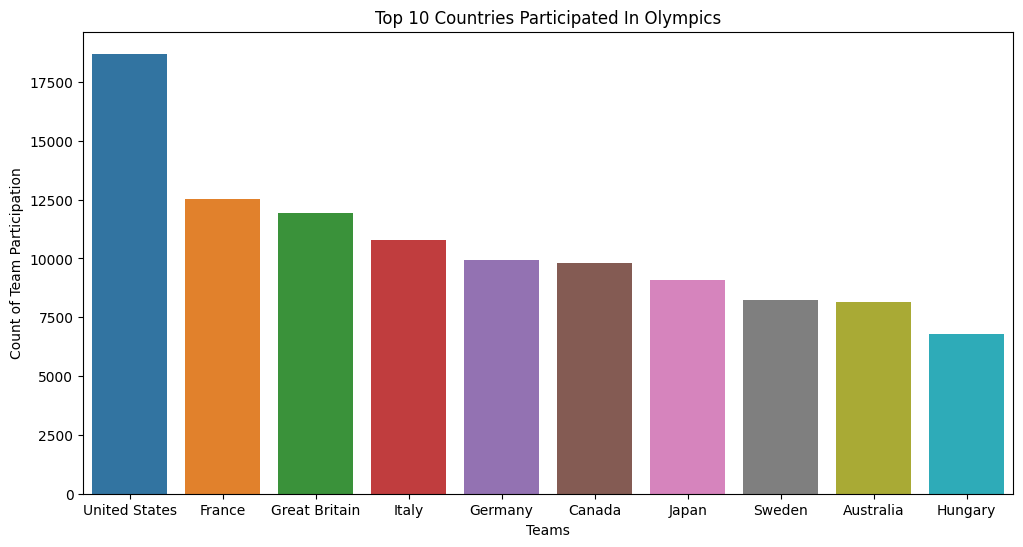

In [ ]:
# plot for top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x = top_10_countries.index,y = top_10_countries)
plt.xlabel('Teams')
plt.ylabel('Count of Team Participation')
plt.title('Top 10 Countries Participated In Olympics')
plt.show()

### **Age Distribution of the Participants**

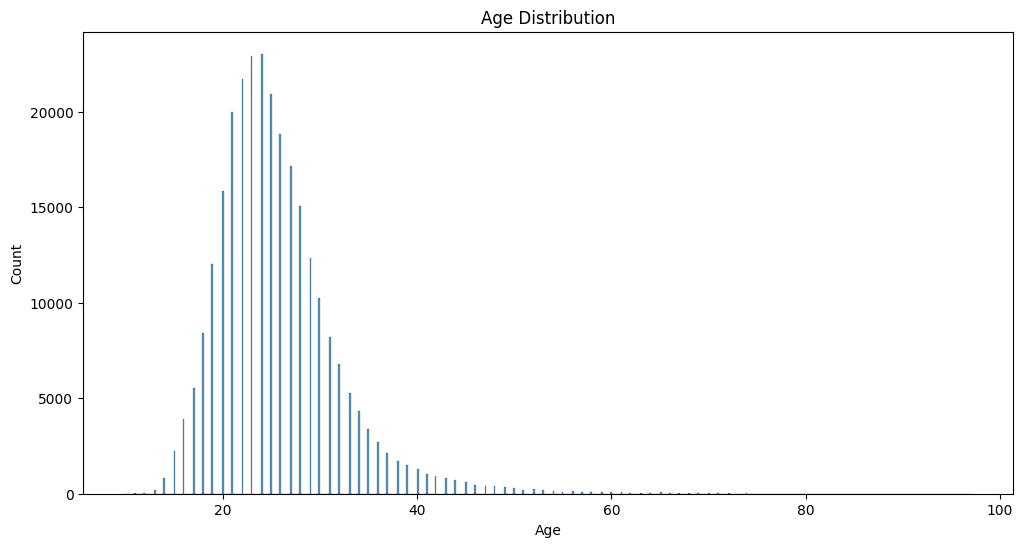

In [ ]:
# Age distribution of the participants
plt.figure(figsize=(12,6))
sns.histplot(data_df.Age)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

**So, Most number of athletes are between 20 to 40 years of age**

###**Merging region with data_df**

In [ ]:
df_merged=data_df.merge(region_df,on='NOC',how='left')


**Total Teams,Regions, Events in Summer Olympics and Winter Olympics**

In [ ]:
total_count=data_df.groupby('Season')[["Team","NOC","Event","City","Sport"]].nunique().reset_index()
total_count

,Season,Team,NOC,Event,City,Sport
0,Summer,1169,233,957,23,70
1,Winter,221,119,119,19,17


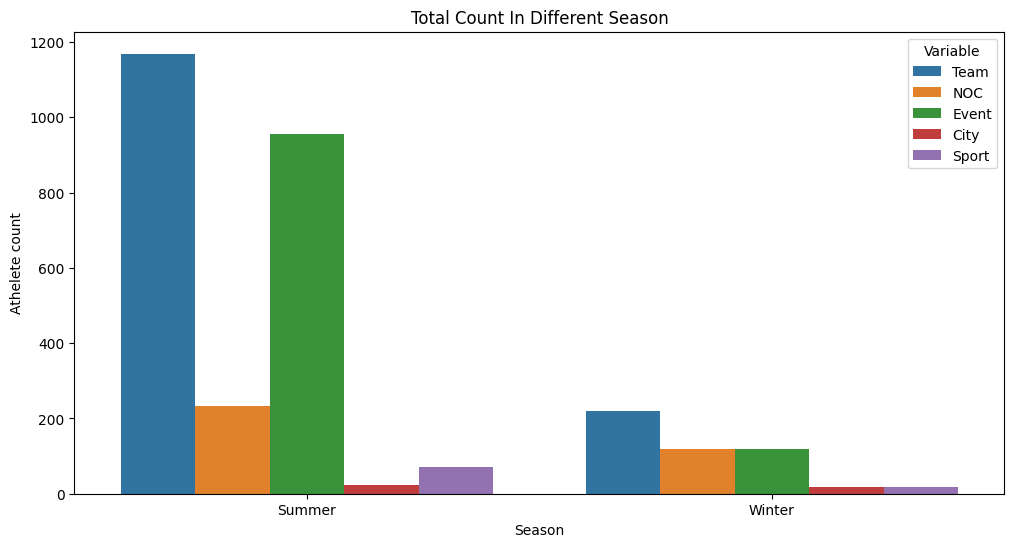

In [ ]:
tidy = total_count.melt(id_vars='Season').rename(columns=str.title)

plt.subplots(figsize=(12, 6))
sns.barplot(x='Season', y='Value', hue='Variable', data=tidy)
plt.title('Total Count In Different Season')
plt.ylabel("Athelete count")
plt.show()

### **Clean Data**

In [ ]:
columns_to_keep = ["Sex","Age","Team","NOC","Season","City","Sport","Event", "Medal"]
data_df = data_df.loc[:,columns_to_keep]
data_df.shape

(286237, 9)

In [ ]:
data_df.dtypes


Sex        object
Age       float64
Team       object
NOC        object
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [ ]:
data_df.head()

,Sex,Age,Team,NOC,Season,City,Sport,Event,Medal
0,M,24.0,China,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,China,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,Denmark,DEN,Summer,Antwerpen,Football,Football Men's Football,NaN
3,M,34.0,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,18.0,Netherlands,NED,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


Medals

In [ ]:
data_df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
data_df.loc[data_df["Medal"].isnull(),"Medal"] = "None"
data_df.Medal.unique()

array(['None', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
values_to_replace = {"None":0.0, "Bronze":3.0, "Silver":2.0, "Gold":1.0}
data_df["Medal"].replace(values_to_replace, inplace = True)
data_df.Medal.unique()

array([0., 1., 3., 2.])

In [ ]:
data_df.Medal.describe()


count     42232
unique        3
top        Gold
freq      14172
Name: Medal, dtype: object

In [ ]:
data_df.groupby("Medal").count()["Sex"]/data_df.shape[0]

Medal
0.0    0.852458
1.0    0.049511
2.0    0.048554
3.0    0.049476
Name: Sex, dtype: float64

### **Medals for top 20 Countries**

In [ ]:
#total medals
data_df.Medal.value_counts()

Gold      14172
Bronze    14162
Silver    13898
Name: Medal, dtype: int64

<ipython-input-101-86e887a5dc2e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  total_medals_by_country=total_medals_by_country.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)


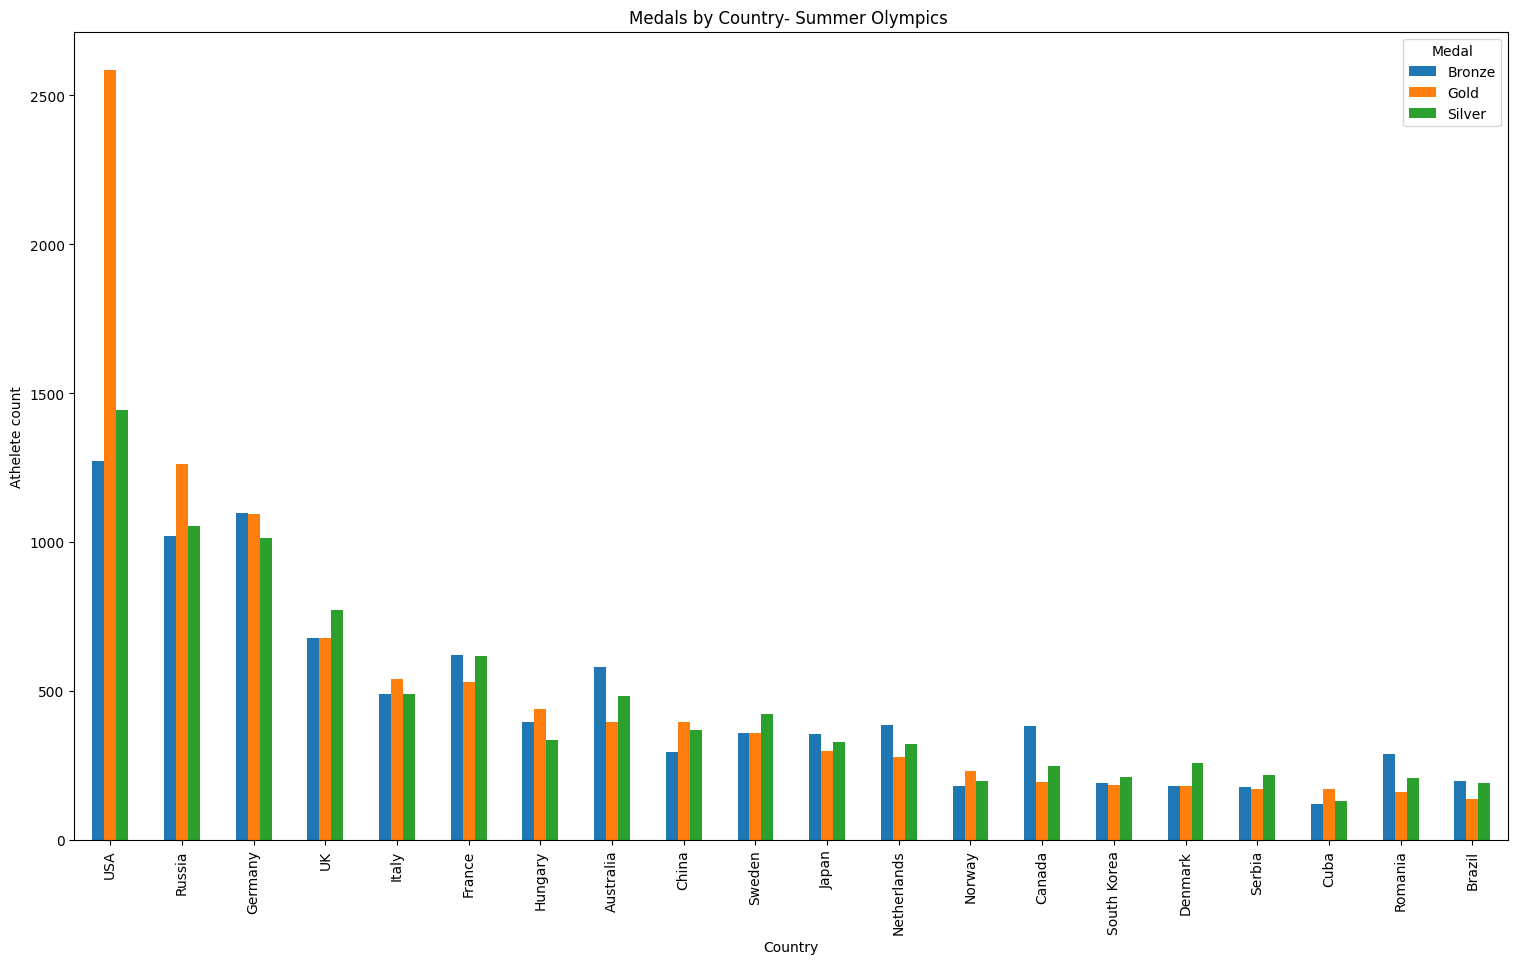

In [ ]:
# Medals for Top 20 countries in summer olympics
total_medals_by_country = df_merged[df_merged['Season']=='Summer'].groupby(['region','Medal'])['Sex'].count().reset_index()
total_medals_by_country=total_medals_by_country.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)
#total_medals_by_country
total_medals_by_country.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel("Athelete count")
plt.title('Medals by Country- Summer Olympics ')
plt.show()

<ipython-input-102-1524e438aa67>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  total_medals_by_country=total_medals_by_country.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)


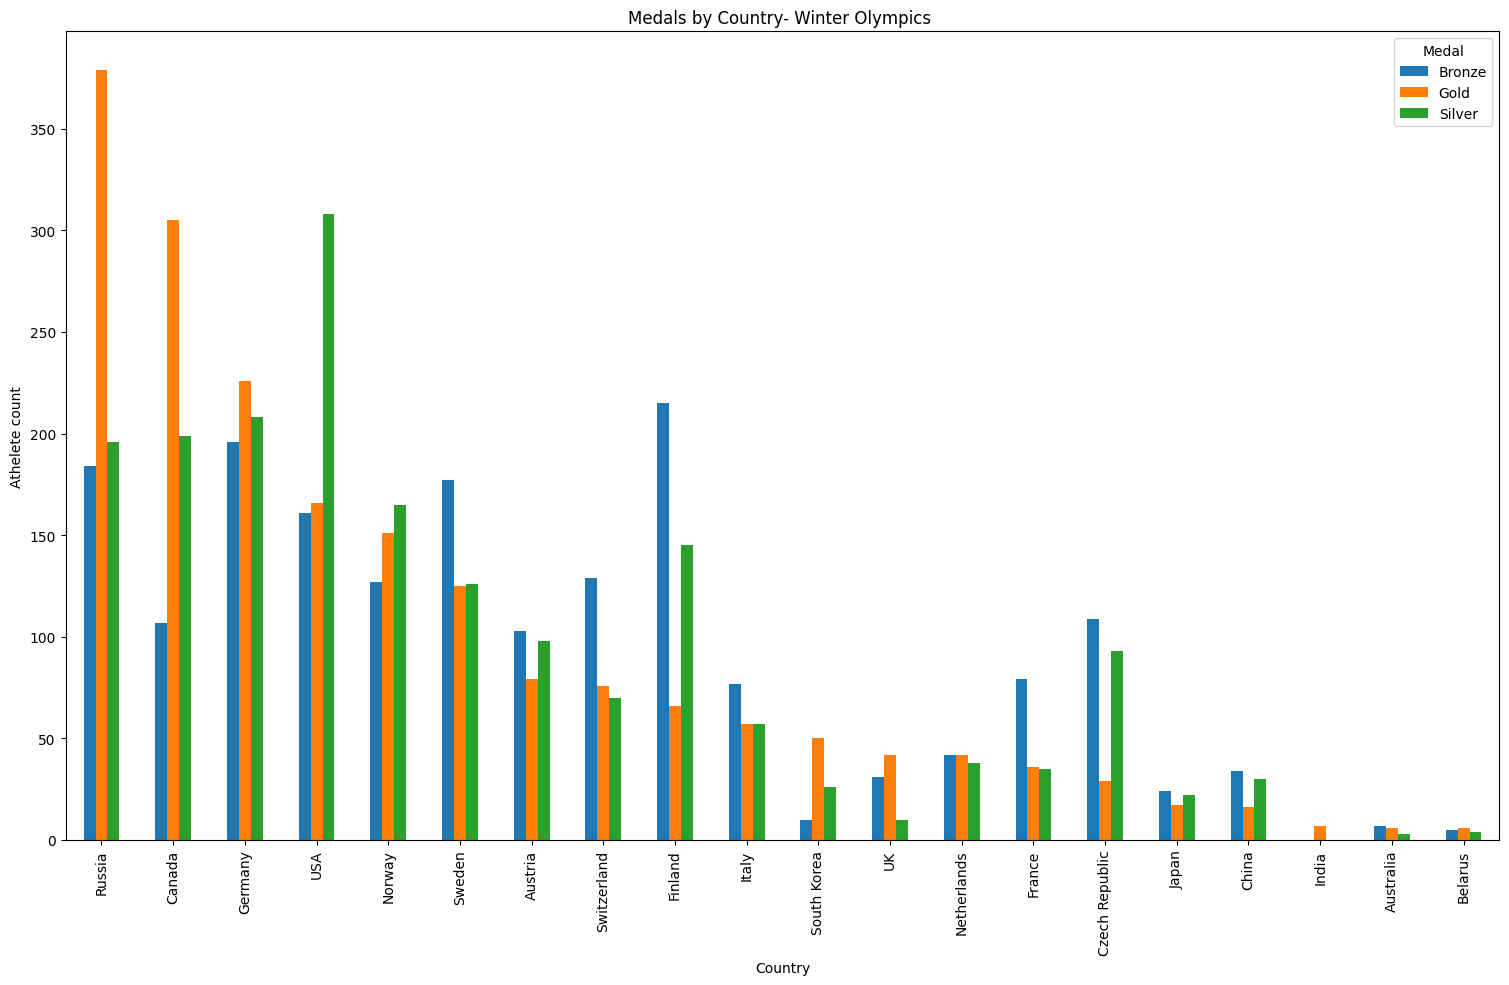

In [ ]:
# Medals for Top 20 countries in winter olympics
total_medals_by_country = df_merged[df_merged['Season']=='Winter'].groupby(['region','Medal'])['Sex'].count().reset_index()
total_medals_by_country=total_medals_by_country.pivot('region','Medal','Sex').fillna(0).sort_values(by='Gold',ascending=False).head(20)
#total_medals_by_country
total_medals_by_country.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel("Athelete count")
plt.title('Medals by Country- Winter Olympics ')
plt.show()

### **Gold Medal for each country**

In [ ]:
goldMedals = df_merged[df_merged['Medal'] == 'Gold']
goldMedals.region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2751
1,Russia,1640
2,Germany,1322
3,UK,719
4,Italy,597


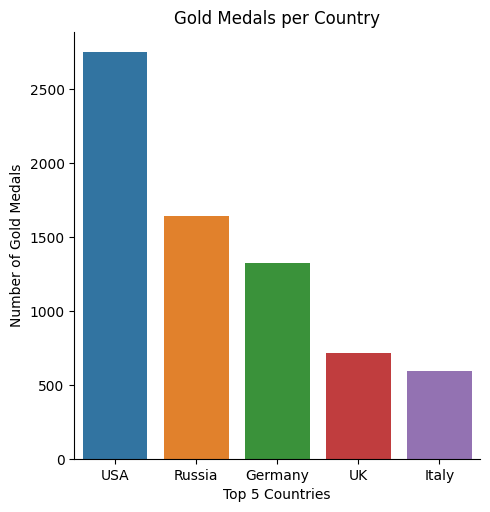

In [ ]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head()


sns.catplot(x='index',y='Medal',data=totalGoldMedals,
           height=5,kind='bar')
plt.xlabel('Top 5 Countries')
plt.ylabel('Number of Gold Medals')
plt.title('Gold Medals per Country')
plt.show()

### **Athletes Participated in Summer Olympics**

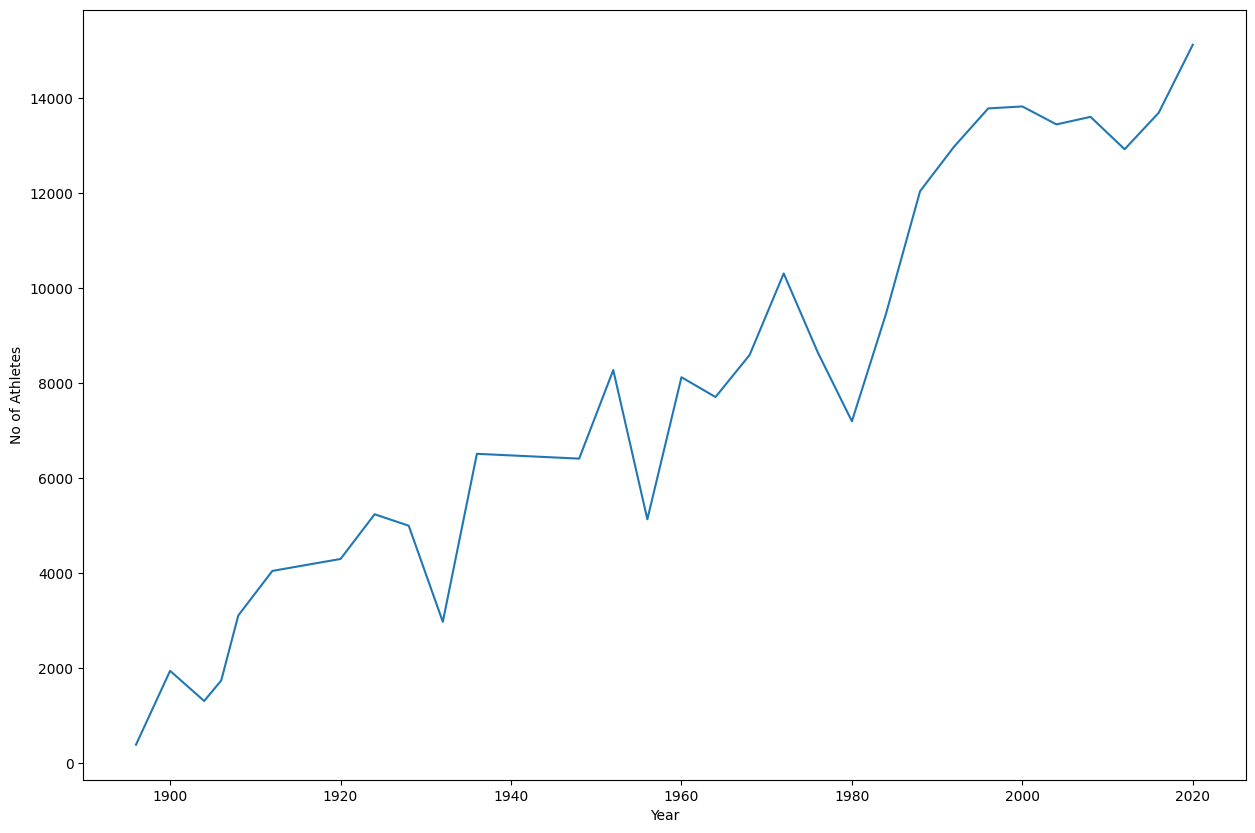

In [ ]:
# Atheletes Participated in Summer Olympics
athletes_per_year = df_merged[df_merged['Season']=='Summer'].groupby('Year')["Name"].count().reset_index()

plt.figure(figsize=(15, 10))
sns.lineplot(data=athletes_per_year, x="Year", y="Name")
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()

### **Athletes Participated in Summer Olympics**

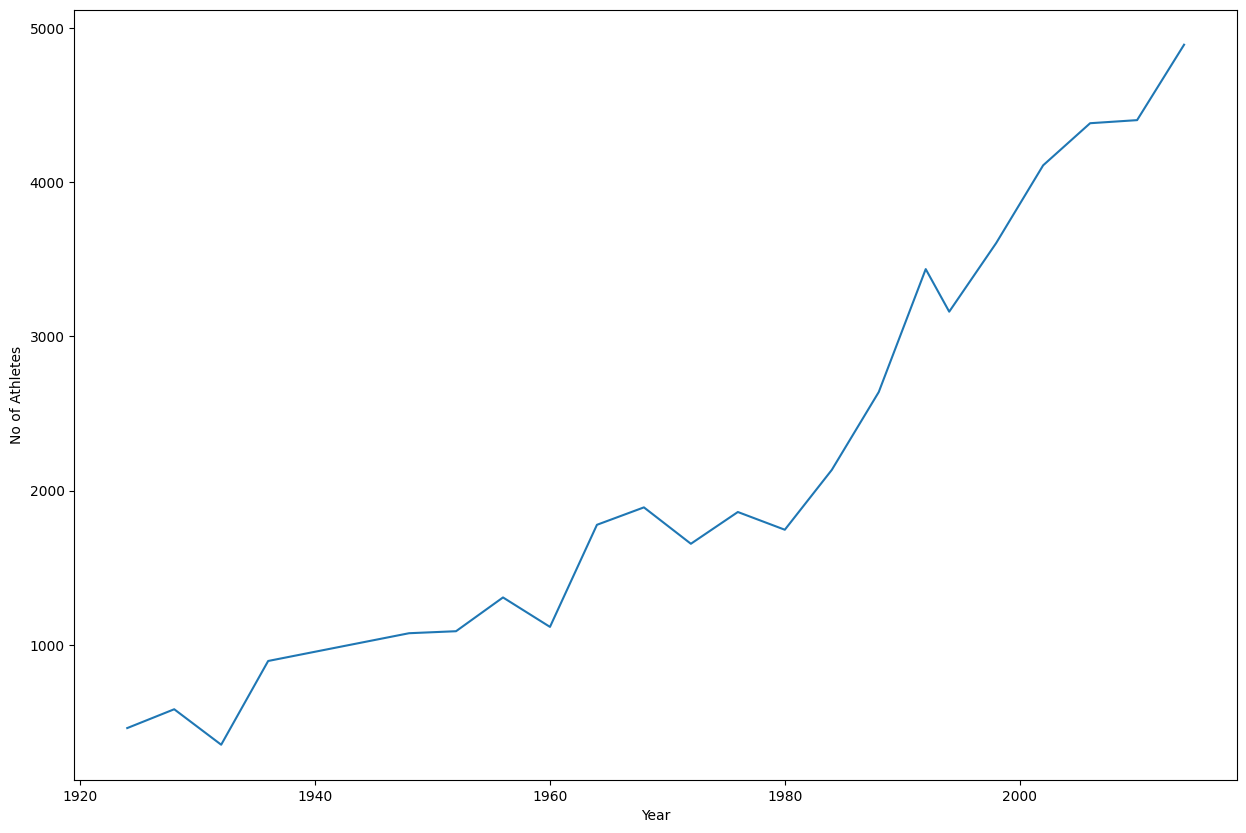

In [ ]:
# Atheletes Participated in Summer Olympics
athletes_per_year = df_merged[df_merged['Season']=='Winter'].groupby('Year')['Name'].count().reset_index()

plt.figure(figsize=(15, 10))
sns.lineplot(data=athletes_per_year, x="Year", y="Name")
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()

### **Sex(Male/Female)**

In [ ]:
data_df.Sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
values_to_replace = {"M":2.0, "F":1.0}
data_df["Sex"].replace(values_to_replace, inplace = True)
data_df.Sex.unique()

array([2., 1.])

### **Participation based on Gender**

In [ ]:
gender_counts = data_df.Sex.value_counts()
gender_counts

M    204449
F     81788
Name: Sex, dtype: int64

**Since Inception of olympics, we have more number of male participants than female participants.**

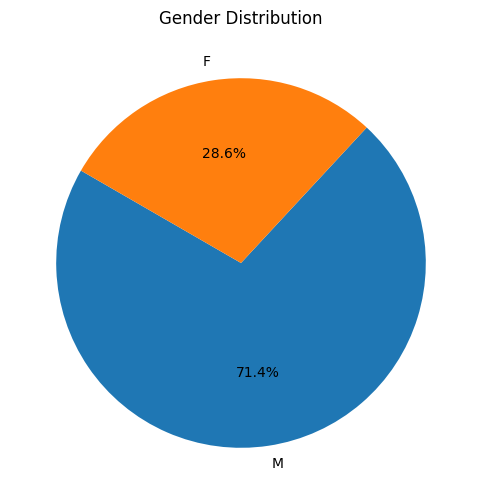

In [ ]:
# pie chart for male and female participants
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels = gender_counts.index, autopct = '%1.1f%%',startangle=150 )
plt.title('Gender Distribution')
plt.show()

**Distribution According to Sex in both Season**

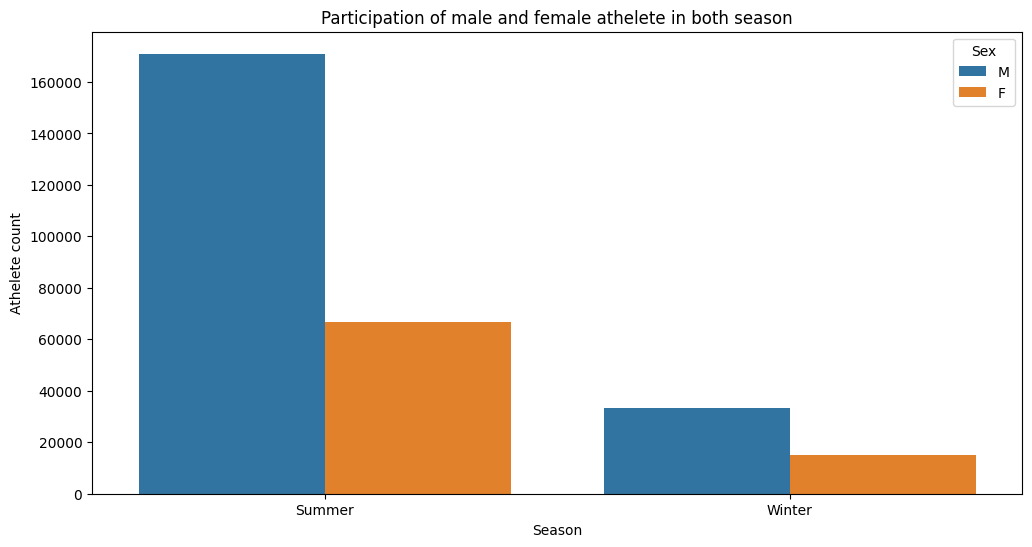

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Season", hue="Sex", data=data_df)
plt.title('Participation of male and female athelete in both season')
plt.ylabel("Athelete count")
plt.show()

### **Total number of Male Athletes in Olympics**

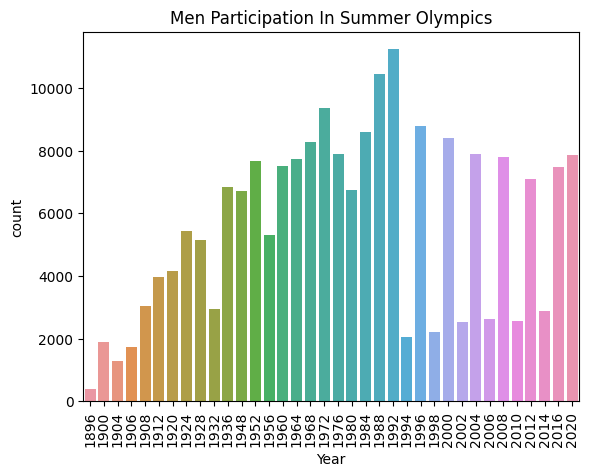

In [ ]:
male_participants = df_merged[(df_merged['Sex'] == 'M')]

sns.countplot(x='Year',data=male_participants)
plt.title('Men Participation In Olympics')
plt.xticks(rotation=90)
plt.show()

### **Total number of Male Athletes in Olympics**

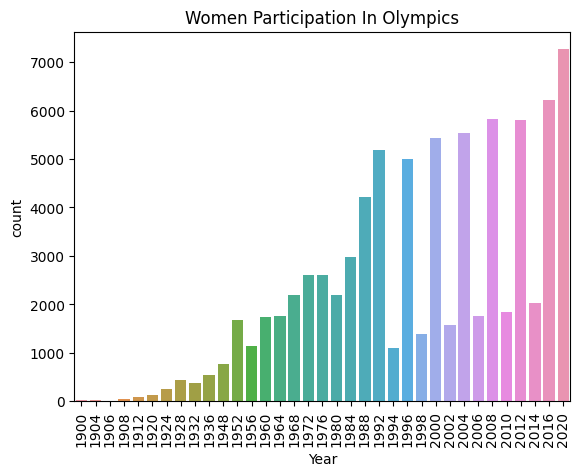

In [ ]:
Female_participants = df_merged[(df_merged['Sex'] == 'F')]

sns.countplot(x='Year',data=Female_participants)
plt.title('Women Participation In Olympics')
plt.xticks(rotation=90)
plt.show()

### **Team**

In [ ]:
teams = data_df.Team.unique()
teams

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Uzbekistan-1',
       'Jamaica-1', 'Luxembourg-1'], dtype=object)

In [ ]:
values = np.arange(len(teams))
values_to_replace = dict(zip(teams, values))
data_df["Team"].replace(values_to_replace, inplace = True)
data_df.Team.unique()

array([   0,    1,    2, ..., 1193, 1194, 1195])

### **Events**

In [ ]:
events = data_df.Event.unique()
events

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", ...,
       "Snowboarding Women's Parallel Giant Slalom",
       "Speed Skating Men's Allround",
       "Snowboarding Women's Parallel Slalom"], dtype=object)

In [ ]:
values = np.arange(len(events))
values_to_replace = dict(zip(events, values))
data_df["Event"].replace(values_to_replace, inplace = True)
data_df.Event.unique()

array([   0,    1,    2, ..., 1068, 1069, 1070])

### **NOC**

In [ ]:
NOCs = data_df.NOC.unique()
NOCs

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

In [ ]:
values = np.arange(len(NOCs))
values_to_replace = dict(zip(NOCs, values))
data_df["NOC"].replace(values_to_replace, inplace = True)
data_df.NOC.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### **Season**

In [ ]:
seasons = data_df.Season.unique()
seasons

array(['Summer', 'Winter'], dtype=object)

In [ ]:
values = np.arange(len(seasons))
values_to_replace = dict(zip(seasons, values))
data_df["Season"].replace(values_to_replace, inplace = True)
data_df.Season.unique()

### **City**

In [ ]:
cities = data_df.City.unique()
cities

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis', 'Calgary', 'Albertville', 'Lillehammer',
       'Salt Lake City', 'Lake Placid', 'Sochi', 'Nagano', 'Torino',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Oslo',
       "Cortina d'Ampezzo", 'Vancouver', 'Grenoble', 'Sapporo',
       'Chamonix', 'Sankt Moritz', 'Garmisch-Partenkirchen'], dtype=object)

In [ ]:
values = np.arange(len(cities))
values_to_replace = dict(zip(cities, values))
data_df["City"].replace(values_to_replace, inplace = True)
data_df.City.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### **Sport**

In [ ]:
sports = data_df.Sport.unique()
sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics', 'Cycling Road', 'Artistic Gymnastics',
       'Karate', 'Baseball/Softball', 'Trampoline Gymnastics',
       'Marathon Swimming', 'Canoe Slalom', 'Surfing', 'Canoe Sprint',
       'Cycling BMX Racing', 'Equestrian', 

In [ ]:
values = np.arange(len(sports))
values_to_replace = dict(zip(sports, values))
data_df["Sport"].replace(values_to_replace, inplace = True)
data_df.Sport.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

### **Age**

In [ ]:
data_df.Age.isnull().sum()/data_df.shape[0]

0.03309844639232524

In [ ]:
median_age = np.nanmedian(data_df["Age"])
median_age

25.0

In [ ]:
data_df.loc[data_df["Age"].isnull(),"Age"] = median_age
data_df.Age.isnull().sum()/data_df.shape[0]

0.0

### **Check dataset and convert to float**

In [ ]:
data_df.dtypes

Sex       float64
Age       float64
Team        int64
NOC         int64
Season      int64
City        int64
Sport       int64
Event       int64
Medal     float64
dtype: object

In [ ]:
data_df["Team"]   = data_df.loc[:,"Team"].astype(float)
data_df["NOC"]    = data_df.loc[:, "NOC"].astype(float)
data_df["Season"] = data_df.loc[:, "Season"].astype(float)
data_df["City"] = data_df.loc[:, "City"].astype(float)
data_df["Sport"] = data_df.loc[:, "Sport"].astype(float)
data_df["Event"] = data_df.loc[:, "Event"].astype(float)


data_df.dtypes

Sex       float64
Age       float64
Team      float64
NOC       float64
Season    float64
City      float64
Sport     float64
Event     float64
Medal     float64
dtype: object

### **Split Dataset into training , validation and datasets**

In [ ]:
y_col = "Medal"
y_col

'Medal'

In [ ]:
x_cols =['Sex', 'Age', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event']
x_cols

['Sex', 'Age', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event']

In [ ]:
X = data_df.copy(deep = True)
X.shape

(286237, 9)

In [ ]:
y = data_df[y_col].apply(pd.to_numeric)
y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
48559    0.0
48560    0.0
48561    0.0
48562    0.0
48563    0.0
Name: Medal, Length: 286237, dtype: float64

In [ ]:
X = X[x_cols]
X.shape

(286237, 8)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_valid_index in split.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_valid  = X.iloc[test_valid_index]
    y_valid  = y.iloc[test_valid_index]

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_train:  (171742, 8)
y_train:  (171742,)
X_valid:  (114495, 8)
y_valid:  (114495,)


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for valid_index, test_index in split.split(X_valid, y_valid):
    X_valid = X.iloc[valid_index]
    y_valid = y.iloc[valid_index]
    X_test  = X.iloc[test_index]
    y_test  = y.iloc[test_index]

print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

X_test:  (57248, 8)
y_test:  (57248,)
X_valid:  (57247, 8)
y_valid:  (57247,)


### **Decision Tree Classifier**

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, criterion ="entropy")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
valid_score = clf.score(X_valid,y_valid)
print("- depth : ", 2, " - train score : ", train_score, " -  valid score : ", valid_score)

- depth :  2  - train score :  0.8524589209395489  -  valid score :  0.8479221618600101


In [ ]:
clf = DecisionTreeClassifier(max_depth = 4, criterion ="entropy")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
valid_score = clf.score(X_valid,y_valid)
print("- depth : ", 4, " - train score : ", train_score, " -  valid score : ", valid_score)

- depth :  4  - train score :  0.853675862631156  -  valid score :  0.849476828480095


In [ ]:
best_acc = 0.0
depths   = range(5, 120, 1)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth = depth, criterion ="entropy",class_weight={0:0.85,1:0.05,2:0.05,3:0.05})

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    valid_score = clf.score(X_valid,y_valid)
    print("- depth : ", depth, " - train score : ", train_score, " -  valid score : ", valid_score)

    if best_acc < valid_score:
        print("--- new best accuracy found at " , depth , " depths ---")
        best_acc = valid_score

- depth :  5  - train score :  0.8537049760687543  -  valid score :  0.8494593603158244
--- new best accuracy found at  5  depths ---
- depth :  6  - train score :  0.8537806710065098  -  valid score :  0.8495816374657187
--- new best accuracy found at  6  depths ---
- depth :  7  - train score :  0.8542581313831212  -  valid score :  0.8500532779010254
--- new best accuracy found at  7  depths ---
- depth :  8  - train score :  0.855265456324021  -  valid score :  0.8509790906073681
--- new best accuracy found at  8  depths ---
- depth :  9  - train score :  0.8572218793306239  -  valid score :  0.8526735025416179
--- new best accuracy found at  9  depths ---
- depth :  10  - train score :  0.8601041096528513  -  valid score :  0.8555382814819991
--- new best accuracy found at  10  depths ---
- depth :  11  - train score :  0.8642615085418826  -  valid score :  0.8592240641430992
--- new best accuracy found at  11  depths ---
- depth :  12  - train score :  0.8702122951869665  -  vali

In [ ]:
clf = DecisionTreeClassifier(max_depth = 115, criterion ="entropy", class_weight={0:0.85,1:0.05,2:0.05,3:0.05})

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf_train_score = clf.score(X_train,y_train)
clf_valid_score = clf.score(X_valid,y_valid)
print("- depth : ", 115, " - train score : ", clf_train_score, " -  valid score : ", clf_valid_score)

- depth :  115  - train score :  0.9949983114206193  -  valid score :  0.9444163012908974


In [ ]:
y_pred = clf.predict(X_valid)
y_pred

array([0., 0., 2., ..., 0., 2., 2.])

In [ ]:
importances = clf.feature_importances_
importances =  pd.DataFrame(x_cols, importances)
importances

,0
0.021451,Sex
0.163674,Age
0.081812,Team
0.082487,NOC
0.000842,Season
0.278736,City
0.112623,Sport
0.258375,Event


In [ ]:
print(metrics.classification_report(y_pred, y_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     48514
         1.0       0.81      0.82      0.82      2886
         2.0       0.80      0.80      0.80      2911
         3.0       0.77      0.76      0.76      2936

    accuracy                           0.94     57247
   macro avg       0.84      0.84      0.84     57247
weighted avg       0.94      0.94      0.94     57247



In [ ]:
y_pred_valid = clf.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
cm

array([[47143,   373,   451,   574],
       [  413,  2375,    73,    62],
       [  431,    69,  2321,    74],
       [  527,    69,    66,  2226]])

In [ ]:
accuracy          = (cm[0][0] + cm[1][1])/len(y_pred_valid)
misclassification = (cm[0][1] + cm[1][0])/len(y_pred_valid)
sensitivity       = (cm[0][0])/(cm[0][0] + cm[0][1])
specificity       = (cm[1][1])/(cm[1][0] + cm[1][1])
print("Accuracy         : ", accuracy)
print("Misclassfication : ", misclassification)
print("Recall           : ", sensitivity)
print("Specificity      : ", specificity)

Accuracy         :  0.8649885583524027
Misclassfication :  0.013729977116704805
Recall           :  0.9921500126273255
Specificity      :  0.8518651362984218


**Summary**

We have found that a depth at around 115 could classify suitably medalists. However, the high recall may not be too bad; 85% of the entries are athletes receiving no medal. However, the accuracy and precision for bronze medal is the lowest. It is unsuitable to to misclassify medallists, the percentage of receiving a medal is low. So, this type of precision and accuracy is important.

### **Random Forest**

In [ ]:
best_acc = 0.0
n_estimators = range(5,10)
max_depths   = range(90,120,5)

for est in n_estimators:
    for depth in max_depths:
        rf = RandomForestClassifier(n_estimators = est,
                                    max_depth = depth,
                                    class_weight={0:0.85,1:0.05,2:0.05,3:0.05},
                                    random_state = 42)
        rf.fit(X_train, y_train)
        train_score = rf.score(X_train, y_train)
        test_score  = rf.score(X_valid, y_valid)
        print(" - estimators : ", est,
              " - max depths : ", depth,
              " - train score : ", train_score,
              " - valid score : ", valid_score)

        if best_acc < valid_score:
            print("--- new best accuracy found ---")
            best_acc = valid_score

 - estimators :  5  - max depths :  90  - train score :  0.978642382177918  - valid score :  0.9445036421122505
--- new best accuracy found ---
 - estimators :  5  - max depths :  95  - train score :  0.978642382177918  - valid score :  0.9445036421122505
 - estimators :  5  - max depths :  100  - train score :  0.978642382177918  - valid score :  0.9445036421122505
 - estimators :  5  - max depths :  105  - train score :  0.978642382177918  - valid score :  0.9445036421122505
 - estimators :  5  - max depths :  110  - train score :  0.978642382177918  - valid score :  0.9445036421122505
 - estimators :  5  - max depths :  115  - train score :  0.978642382177918  - valid score :  0.9445036421122505
 - estimators :  6  - max depths :  90  - train score :  0.9773497455485554  - valid score :  0.9445036421122505
 - estimators :  6  - max depths :  95  - train score :  0.9773497455485554  - valid score :  0.9445036421122505
 - estimators :  6  - max depths :  100  - train score :  0.977349

In [ ]:
rf = RandomForestClassifier(n_estimators = 5,
                                    max_depth = 90,
                                    class_weight={0:0.85,1:0.05,2:0.05,3:0.05},
                                    random_state = 42)

rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score  = rf.score(X_valid, y_valid)
print(" - estimators : ", 5,
              " - max depths : ", 50,
              " - train score : ", train_score,
              " - valid score : ", valid_score)

 - estimators :  5  - max depths :  50  - train score :  0.978642382177918  - valid score :  0.9445036421122505


In [ ]:
y_pred = rf.predict(X_valid)
y_pred

array([0., 0., 0., ..., 0., 2., 0.])

In [ ]:
importances = rf.feature_importances_
importances =  pd.DataFrame(x_cols, importances)
importances

,0
0.010515,Sex
0.196945,Age
0.056048,Team
0.050332,NOC
0.000561,Season
0.274167,City
0.107747,Sport
0.303685,Event


In [ ]:
print(metrics.classification_report(y_pred, y_valid))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     50342
         1.0       0.72      0.86      0.78      2458
         2.0       0.68      0.87      0.76      2276
         3.0       0.65      0.86      0.74      2171

    accuracy                           0.94     57247
   macro avg       0.76      0.88      0.81     57247
weighted avg       0.95      0.94      0.94     57247



In [ ]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[47957,   190,   191,   203],
       [  713,  2108,    56,    46],
       [  773,    92,  1974,    56],
       [  899,    68,    55,  1866]])

**Summary**:

The accuracy has increased for non-medalists, who represent the majority of athletes participating in the Olympic games. So it remains unsuitable for predicting accurately medalists; some precision has decreased in comparison to the decision trees.

### **Prediction on test data**

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0., 2., 0., ..., 0., 0., 0.])

In [ ]:
importances = clf.feature_importances_
importances =  pd.DataFrame(x_cols, importances)
importances

,0
0.021451,Sex
0.163674,Age
0.081812,Team
0.082487,NOC
0.000842,Season
0.278736,City
0.112623,Sport
0.258375,Event


In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     48420
         1.0       0.83      0.80      0.82      3034
         2.0       0.80      0.78      0.79      2860
         3.0       0.79      0.78      0.78      2934

    accuracy                           0.94     57248
   macro avg       0.85      0.83      0.84     57248
weighted avg       0.94      0.94      0.94     57248



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47154,   466,   469,   545],
       [  382,  2427,    61,    45],
       [  434,    73,  2238,    70],
       [  450,    68,    92,  2274]])

In [ ]:
accuracy          = (cm[0][0] + cm[1][1])/len(y_pred)
misclassification = (cm[0][1] + cm[1][0])/len(y_pred)
sensitivity       = (cm[0][0])/(cm[0][0] + cm[0][1])
specificity       = (cm[1][1])/(cm[1][0] + cm[1][1])
print("Accuracy         : ", accuracy)
print("Misclassfication : ", misclassification)
print("Recall           : ", sensitivity)
print("Specificity      : ", specificity)

Accuracy         :  0.866073923979877
Misclassfication :  0.014812744550027948
Recall           :  0.9902141957160857
Specificity      :  0.8640085439658242


### **To Conclude**
So we have demonstrated how some Decision Trees and Random Forrest classifiers could attempt to classify athletes as non-medalist, bronze medalist, silver medalist, and gold medalist. Some classification on unseen data has achieved some good outcomes for the non-medalists, representing 85% of the athletes. So, the classifiers are accurate to classify the medalists. It is worth noting the precision is nonetheless approximately greater than or equal 80%; 1/5 of medalists are misclassified. This ratio is a bit too high.

it is worth noting both classifiers have identified the city, event, age and sport influencing potentially the most the classification. It shows some grouping of data around the competitions has been learnt by the model fitting process. The latter may be encouraging.